In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import the dataset

In [51]:
data = pd.read_csv(r"C:\Users\manit\OneDrive\Documents\GitHub\Data-Science-Hackathon\dataset\world-happiness-report-2021.csv")
data.tail()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [58]:
ds = pd.read_csv(r"C:\Users\manit\OneDrive\Documents\GitHub\Data-Science-Hackathon\dataset\world-happiness-report.csv")
ds.tail()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1944,Zimbabwe,2016,3.735,7.984,0.768,54.4,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.0,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.6,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831,0.716,0.235
1948,Zimbabwe,2020,3.160,7.829,0.717,56.8,0.643,-0.009,0.789,0.703,0.346


#### check for missing values

In [52]:
data.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

###  Different factors  effect on happiness score

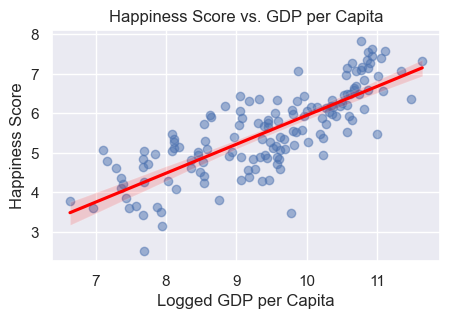

In [78]:
plt.figure(figsize=(5, 3))
sns.regplot(x='Logged GDP per capita', y='Ladder score', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Happiness Score vs. GDP per Capita')
plt.xlabel('Logged GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

### Top ten and bottom ten countries analysis on basis happiness score

In [53]:
data_sorted = data.sort_values(by='Ladder score', ascending=False)

top_10_countries = data_sorted.head(10)

bottom_10_countries = data_sorted.tail(10)

# Analyze the top and bottom ten countries
print("Top Ten Countries by Happiness Score:")
print(top_10_countries[['Country name', 'Ladder score']])

print("\nBottom Ten Countries by Happiness Score:")
print(bottom_10_countries[['Country name', 'Ladder score']])

Top Ten Countries by Happiness Score:
  Country name  Ladder score
0      Finland         7.842
1      Denmark         7.620
2  Switzerland         7.571
3      Iceland         7.554
4  Netherlands         7.464
5       Norway         7.392
6       Sweden         7.363
7   Luxembourg         7.324
8  New Zealand         7.277
9      Austria         7.268

Bottom Ten Countries by Happiness Score:
    Country name  Ladder score
139      Burundi         3.775
140        Yemen         3.658
141     Tanzania         3.623
142        Haiti         3.615
143       Malawi         3.600
144      Lesotho         3.512
145     Botswana         3.467
146       Rwanda         3.415
147     Zimbabwe         3.145
148  Afghanistan         2.523


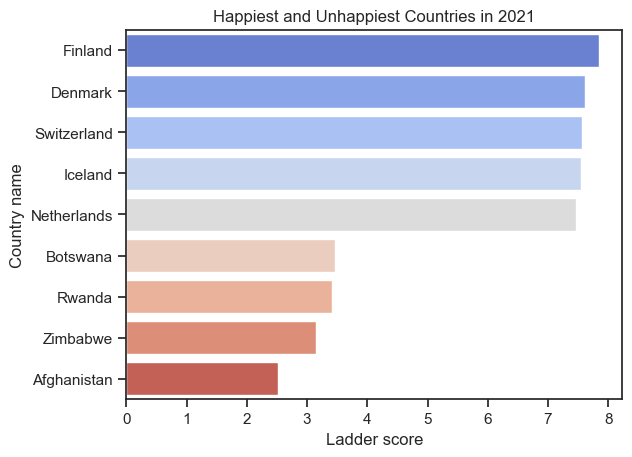

In [54]:
dataset_happiest_unhappiest = data[(data.loc[:, "Ladder score"] > 7.4) | (data.loc[:, "Ladder score"] < 3.5)]
sns.barplot(x = "Ladder score", y = "Country name", data=dataset_happiest_unhappiest, palette = "coolwarm")
plt.title("Happiest and Unhappiest Countries in 2021")
plt.show()

### Relationship Between Happiness in regional areas

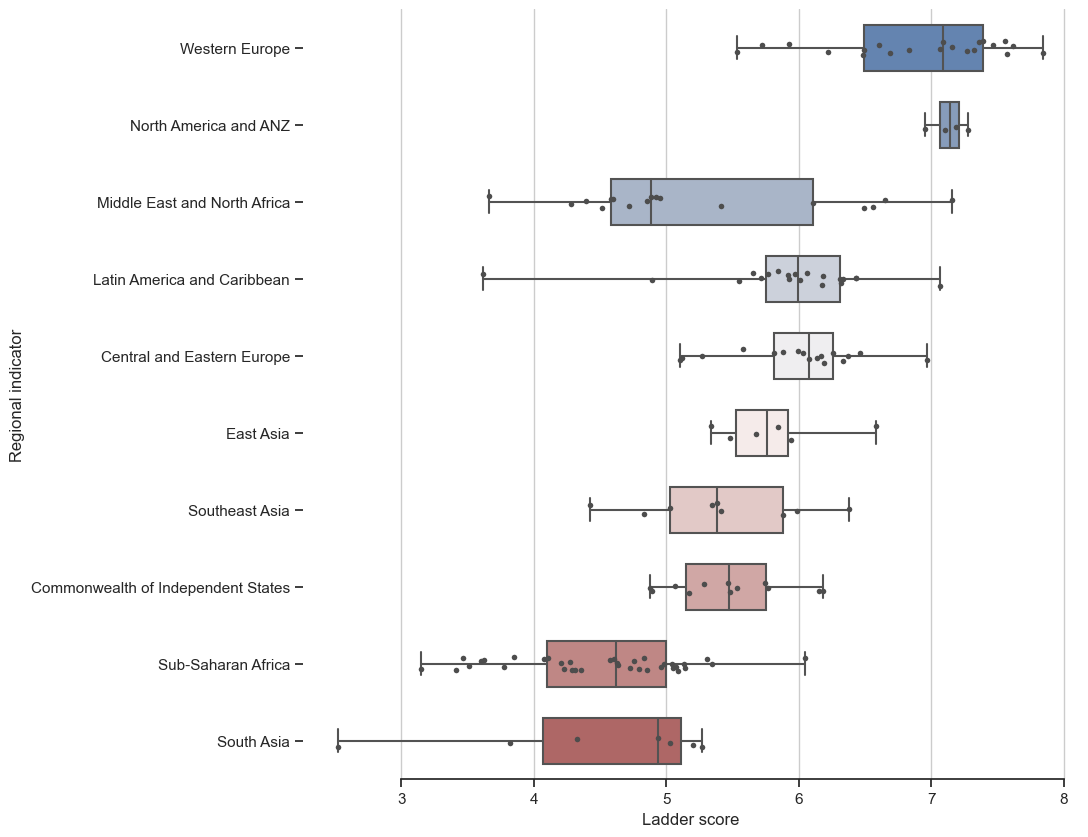

In [55]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="Ladder score", y="Regional indicator", data=data,
            whis=[0, 100], width=.6, palette="vlag")

sns.stripplot(x="Ladder score", y="Regional indicator", data=data,
              size=4, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="Regional indicator")
sns.despine(trim=True, left=True)

### Relationship Between Happiness and Income

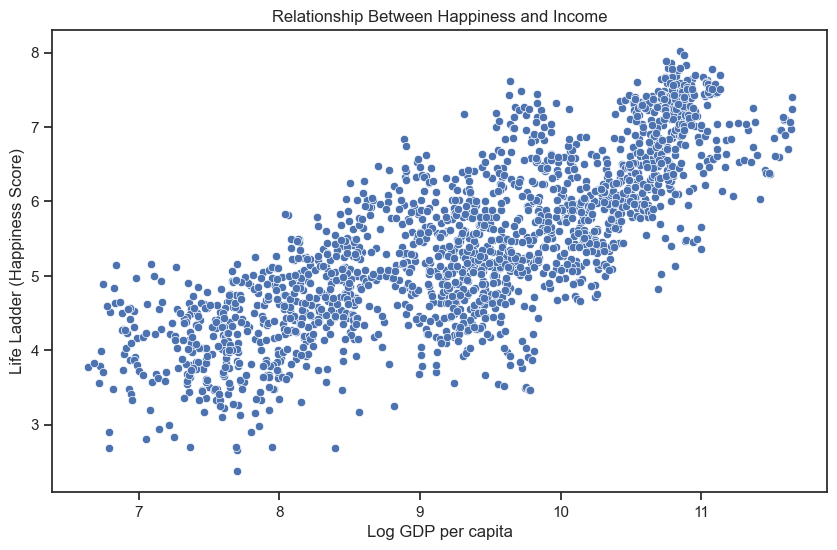

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds, x='Log GDP per capita', y='Life Ladder')

plt.xlabel('Log GDP per capita')
plt.ylabel('Life Ladder (Happiness Score)')
plt.show()

### Relationship Between Happiness and Freedom

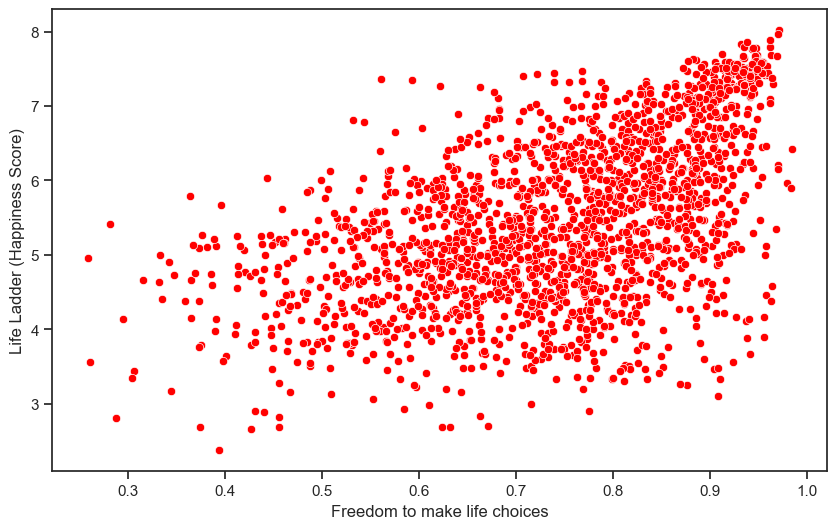

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds, x='Freedom to make life choices', y='Life Ladder', color='red')

plt.xlabel('Freedom to make life choices')
plt.ylabel('Life Ladder (Happiness Score)')
plt.show()


### Relationship Between Happiness and Corruption

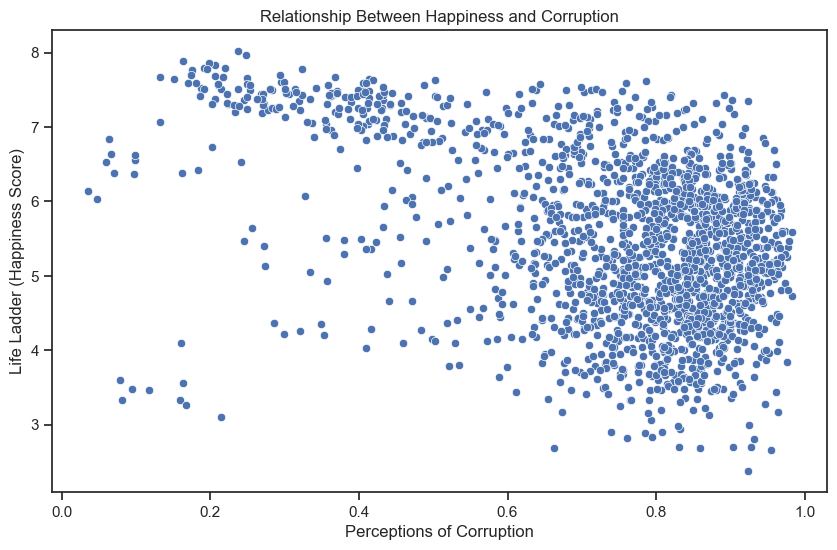

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds, x='Perceptions of corruption', y='Life Ladder')

plt.xlabel('Perceptions of Corruption')
plt.ylabel('Life Ladder (Happiness Score)')
plt.show()

### Ladder Score Distribution by Regional Indicator

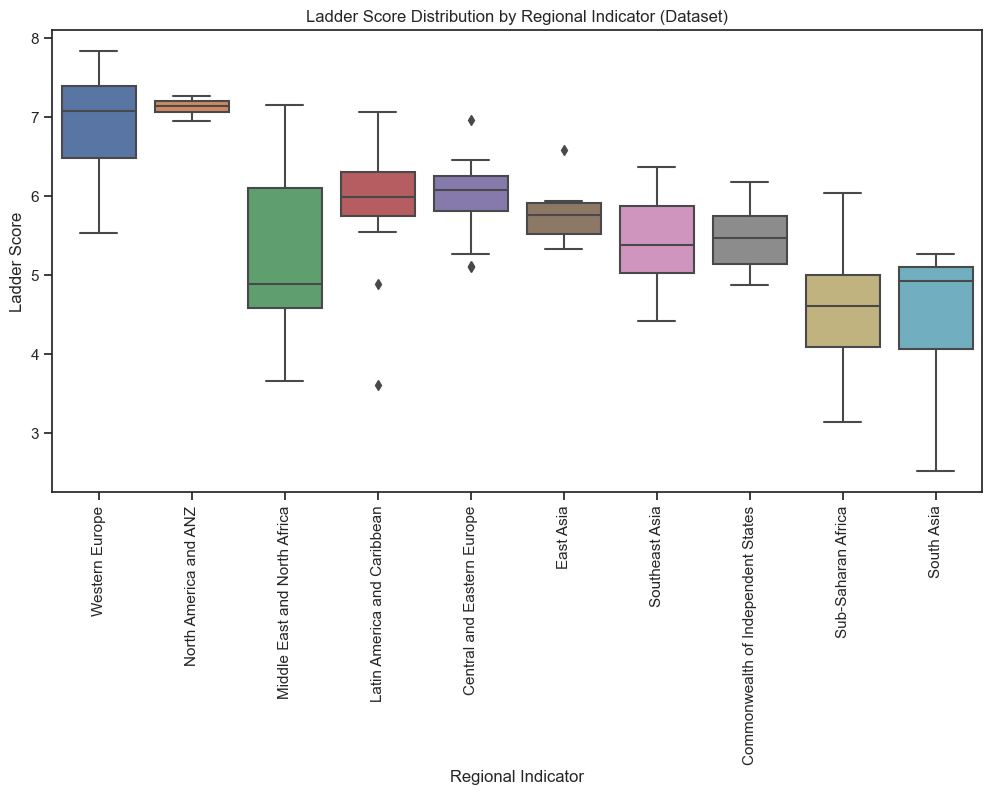

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Regional indicator', y='Ladder score')

plt.xlabel('Regional Indicator')
plt.ylabel('Ladder Score')
plt.xticks(rotation=90)
plt.show()

### Most Generous and Most Ungenerous Countries in 2021

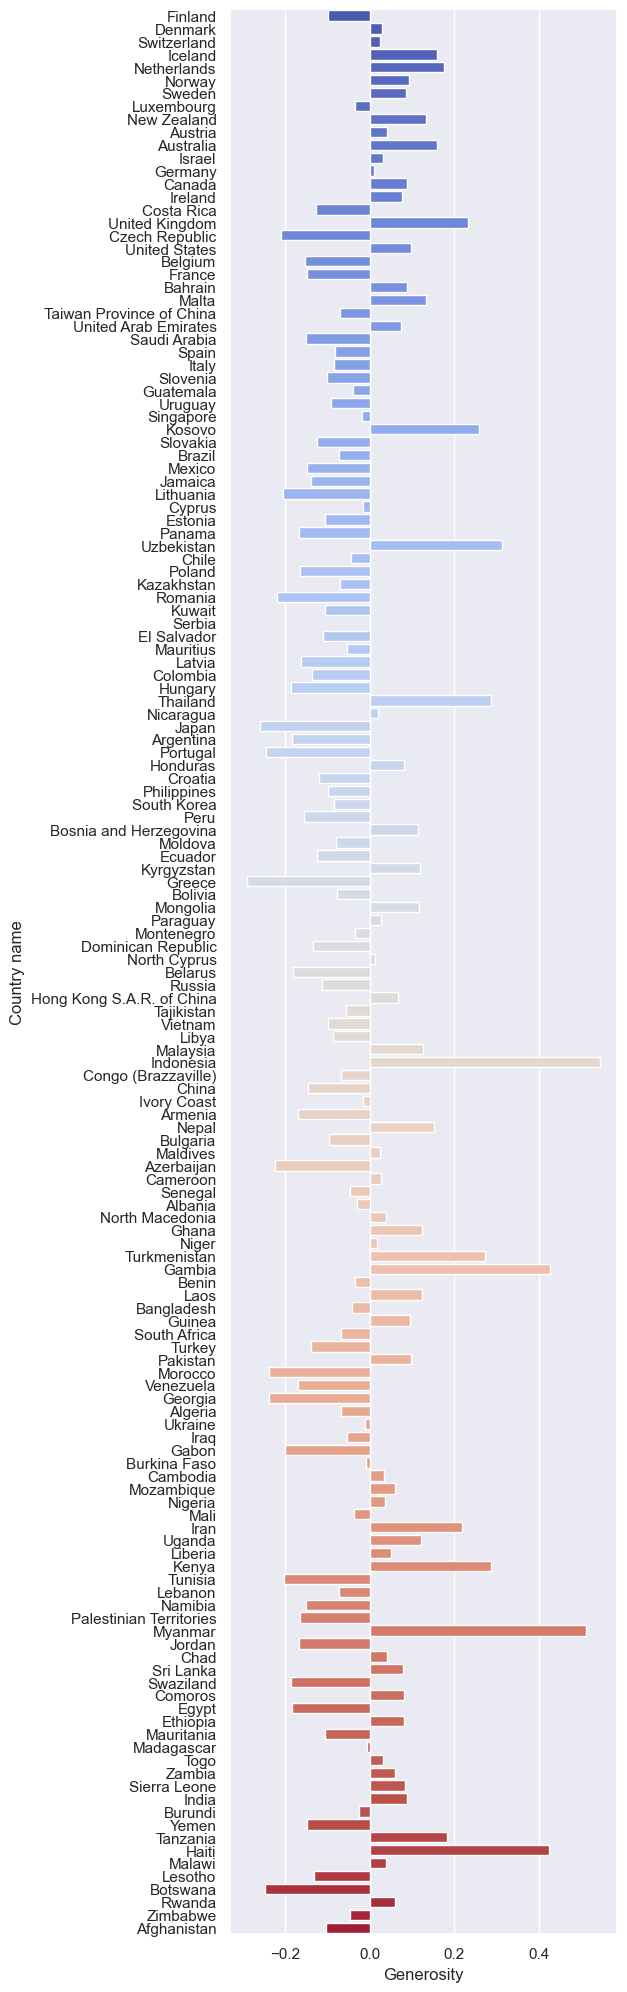

In [70]:
dataset_1 = data[(data.loc[:, "Generosity"] > 0.4) | (data.loc[:, "Generosity"] < -0.2)]
sns.set(rc={'figure.figsize':(5,25)})
sns.barplot(x = "Generosity", y = "Country name", data = data, palette = "coolwarm")
plt.show()

### Relationship Between Features

In [76]:
ds.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.035515,0.078246,-0.010093,0.164059,0.222151,-0.043422,-0.081478,-0.003245,0.196869
Life Ladder,0.035515,1.000000,0.790166,0.707806,0.744506,0.528063,0.190632,-0.427245,0.532273,-0.297488
Log GDP per capita,0.078246,0.790166,1.000000,0.692602,0.848049,0.367932,-0.000915,-0.345511,0.302282,-0.210781
Social support,-0.010093,0.707806,0.692602,1.000000,0.616037,0.410402,0.067000,-0.219040,0.432152,-0.395865
Healthy life expectancy at birth,0.164059,0.744506,0.848049,0.616037,1.000000,0.388681,0.020737,-0.322461,0.318247,-0.139477
Freedom to make life choices,0.222151,0.528063,0.367932,0.410402,0.388681,1.000000,0.329300,-0.487883,0.606114,-0.267661
Generosity,-0.043422,0.190632,-0.000915,0.067000,0.020737,0.329300,1.000000,-0.290706,0.358006,-0.092542
Perceptions of corruption,-0.081478,-0.427245,-0.345511,-0.219040,-0.322461,-0.487883,-0.290706,1.000000,-0.296517,0.264225
Positive affect,-0.003245,0.532273,0.302282,0.432152,0.318247,0.606114,0.358006,-0.296517,1.000000,-0.374439
Negative affect,0.196869,-0.297488,-0.210781,-0.395865,-0.139477,-0.267661,-0.092542,0.264225,-0.374439,1.000000


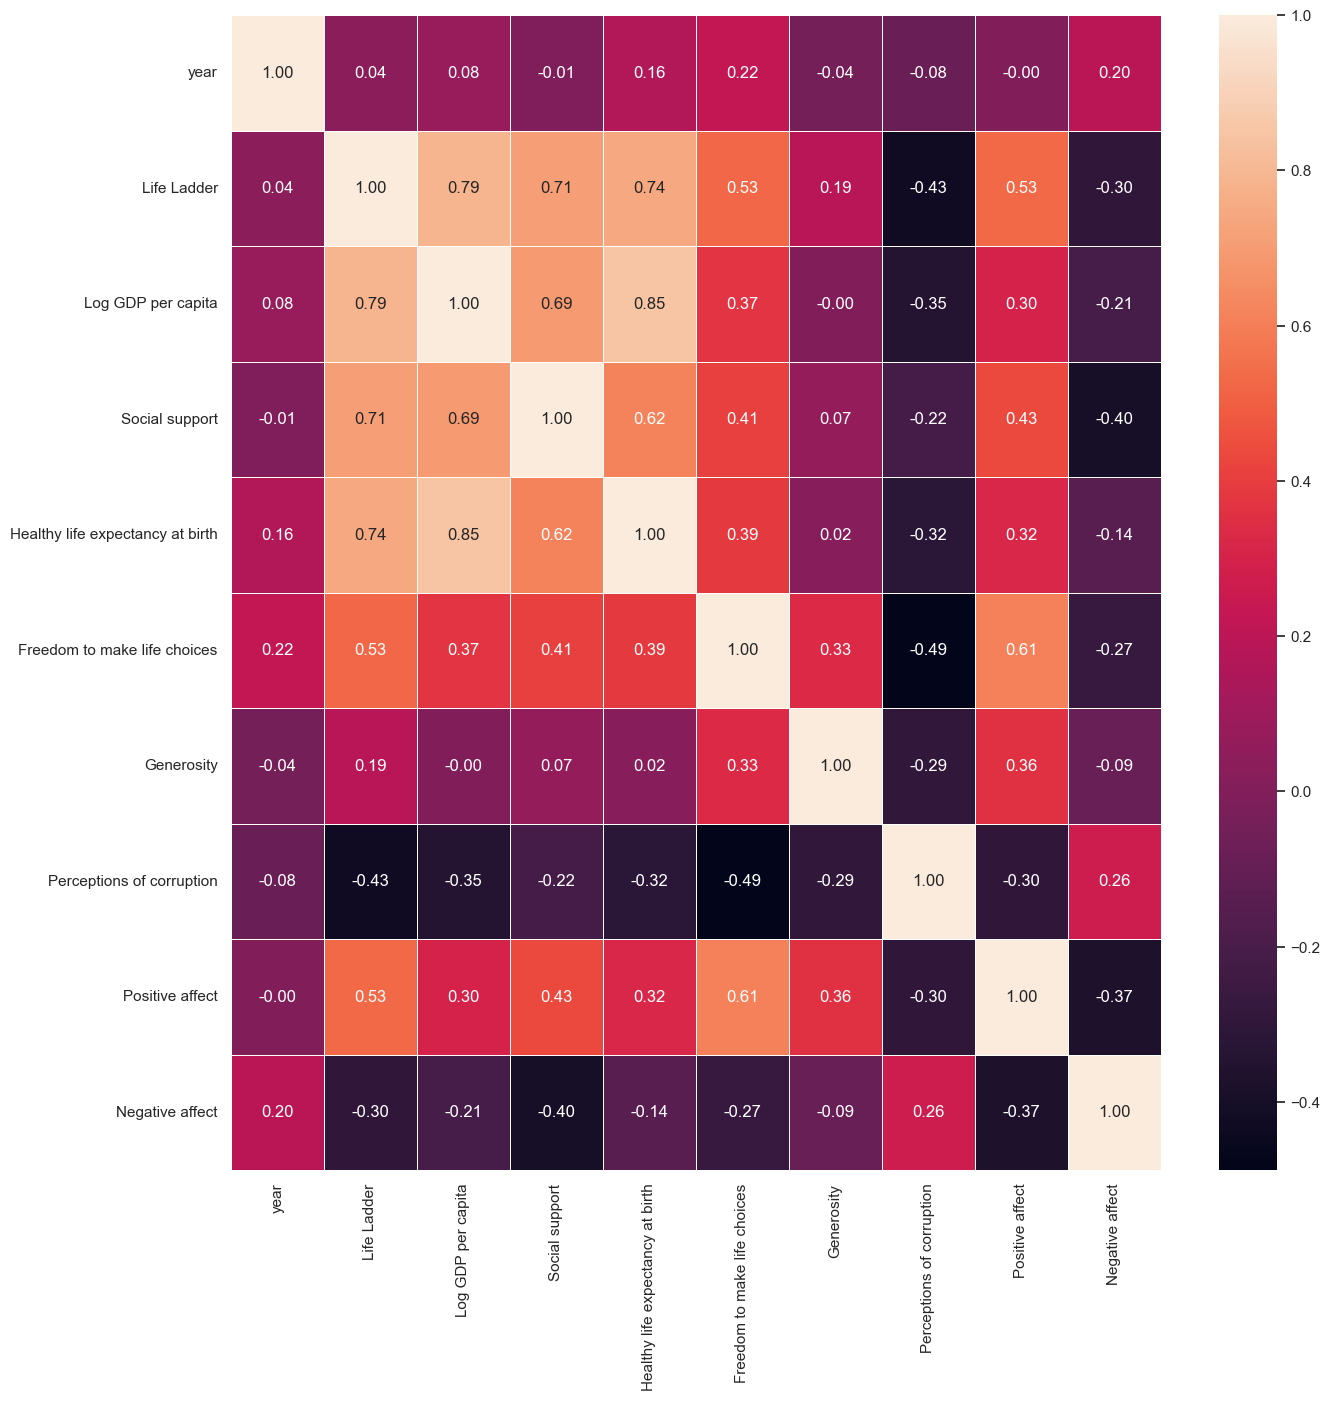

In [77]:
sns.heatmap(ds.corr(), annot = True, fmt = ".2f", linewidth = .7)

sns.set(rc={'figure.figsize':(15,15)})
plt.show()